In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("13-car_evaluation.csv")

In [151]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [152]:
df.shape

(1727, 7)

In [153]:
col_names = ["buying","maint","doors","number_of_persons","lug_boot","safety","class"]
df.columns = col_names

In [154]:
df

,buying,maint,doors,number_of_persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying             1727 non-null   object
 1   maint              1727 non-null   object
 2   doors              1727 non-null   object
 3   number_of_persons  1727 non-null   object
 4   lug_boot           1727 non-null   object
 5   safety             1727 non-null   object
 6   class              1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [156]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
number_of_persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [157]:
#class --> target variable -- doors, persons -> numeric variable -- rest --> categorical 

In [158]:
df.isna().sum()

buying               0
maint                0
doors                0
number_of_persons    0
lug_boot             0
safety               0
class                0
dtype: int64

In [159]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [160]:
df["doors"] = df["doors"].replace("5more", "5")

In [161]:
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

In [162]:
df["doors"] = df["doors"].astype(int)

In [163]:
df["doors"].unique()

array([2, 3, 4, 5])

In [164]:
df["number_of_persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [165]:
df["number_of_persons"] = df["number_of_persons"].replace("more", "5")

In [166]:
df["number_of_persons"] = df["number_of_persons"].astype(int)

In [167]:
df["number_of_persons"].unique()

array([2, 4, 5])

In [168]:
import seaborn as sns

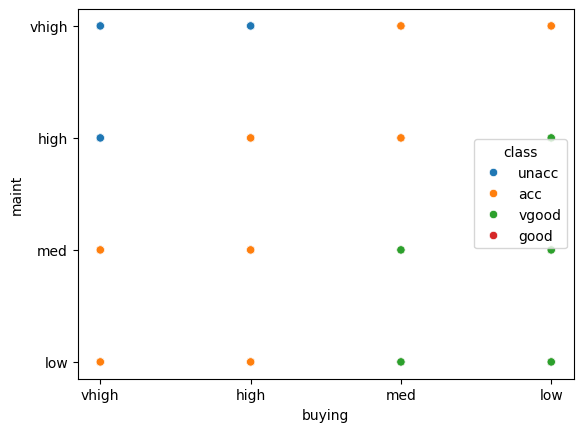

In [169]:
sns.scatterplot(x=df["buying"], y=df["maint"],hue= df["class"])
plt.show()

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X = df.drop("class",axis=1)
y = df["class"]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [173]:
X_train.shape

(1208, 6)

In [174]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [175]:
categorical_col = ["buying", "maint","lug_boot","safety"]
numerical_col = ["doors","number_of_persons"] 

In [183]:
ordinal_encoder = OrdinalEncoder(categories = [ 
    ["low","med","high","vhigh"], #buying
    ["low","med","high","vhigh"], #maint
    ["small","med","big"],  #lug_boot
    ["low","med","high"]   #safety
])

processor = ColumnTransformer(transformers= [  
  ("transformation_name_doesnt_matter", ordinal_encoder, categorical_col)  
],remainder="passthrough")
#Farklı kolonları farklı şekilde transform etmek için kullanılır

X_train_transformed = processor.fit_transform(X_train)
X_test_transformed = processor.transform(X_test)

In [185]:
pd.DataFrame(X_train_transformerd)[5].unique() #doğru şekilde label vermiş

array([2., 4., 5.])

In [187]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
tree_model = DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=3, 
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=0
)
tree_model.fit(X_train_transformerd,y_train)
y_pred = tree_model.predict(X_test_transformed)

In [191]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

In [193]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7861271676300579
[[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]
              precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519



C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.3333333333333333, 0.875, 'number_of_persons <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'safety <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'buying <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

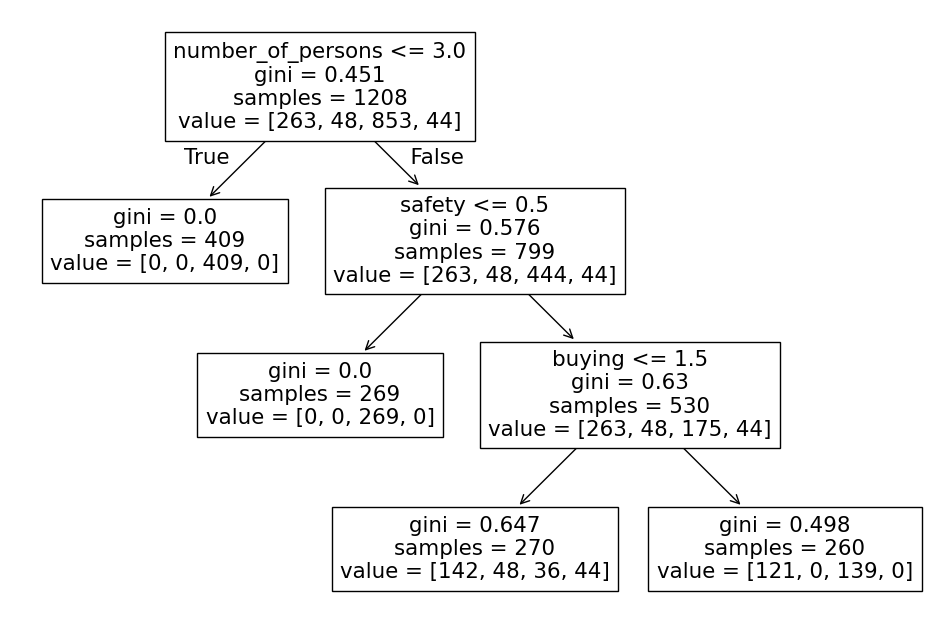

In [198]:
plt.figure(figsize=(12,8))

from sklearn import tree

column_names = categorical_col + numerical_col
tree.plot_tree(tree_model.fit(X_train_transformed, y_train),feature_names=column_names)

In [200]:
#hyperparameter tuning

In [203]:
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt", "log2", None]
}


In [205]:
from sklearn.model_selection import GridSearchCV

In [207]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param, cv=5, scoring="accuracy")

In [211]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [213]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'splitter': 'best'}

In [215]:
grid.best_score_

np.float64(0.968550461232468)

In [217]:
y_pred = grid.predict(X_test_transformed)

In [219]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9730250481695568
[[119   0   1   1]
 [  3  18   0   0]
 [  9   0 347   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519



In [221]:
tree_model_new = DecisionTreeClassifier(criterion="entropy",max_depth=None,max_features=None, splitter="best")

In [225]:
tree_model_new.fit(X_train_transformed, y_train)
y_pred = tree_model_new.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9730250481695568
[[119   0   1   1]
 [  3  18   0   0]
 [  9   0 347   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519



[Text(0.6140202702702703, 0.9615384615384616, 'number_of_persons <= 3.0\nentropy = 1.192\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.6005067567567568, 0.8846153846153846, 'entropy = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.6072635135135136, 0.9230769230769231, 'True  '),
 Text(0.6275337837837838, 0.8846153846153846, 'safety <= 0.5\nentropy = 1.473\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.620777027027027, 0.9230769230769231, '  False'),
 Text(0.6140202702702703, 0.8076923076923077, 'entropy = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6410472972972973, 0.8076923076923077, 'buying <= 1.5\nentropy = 1.641\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.40371621621621623, 0.7307692307692307, 'maint <= 1.5\nentropy = 1.745\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.19932432432432431, 0.6538461538461539, 'safety <= 1.5\nentropy = 1.805\nsamples = 134\nvalue = [43, 48, 8, 35]'),
 Text(0.08108108108108109, 0.5769230769230769, 'lug

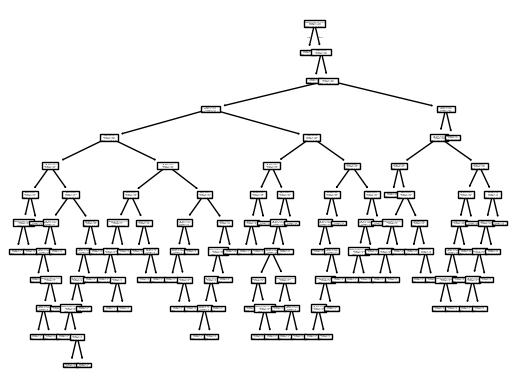

In [227]:
tree.plot_tree(tree_model_new.fit(X_train_transformed, y_train),feature_names=column_names)